<a href="https://colab.research.google.com/github/dudubouneto/Disc_FluxoVacinacao/blob/main/Mortalidade_Infantil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Discretização das variáveis/Data/final_novo_ibge_sp - final_novo_ibge_sp_cpy.csv')
data.head()

,Município,Codigo_IBGE,Gentílico,Prefeito,Área Territorial,População Estimada,Densidade Demográfica,Escolarização 6 a 14 anos,IDHM,Mortalidade Infantil,Receitas Realizadas,Despesas empenhadas,PIB per capita,Latitude,Longitude,Postos vacinação,Hospitais,Médicos
0,ADAMANTINA,3500105,adamantinense,MARCIO CARDIM,412,35111,"82,15","97,6",790,"11,63","16,071,867,925","13,708,366,993","30962,66",-22,-511,4,0,0
1,ADOLFO,3500204,adolfino,IZAEL ANTONIO FERNANDES,211,3554,"16,85","98,6",730,"19,23","2,733,374,731","2,010,387,713","25867,75",-212,-496,1,0,0
2,AGUAÍ,3500303,aguaiano,JOSÉ ALEXANDRE PEREIRA DE ARAÚJO,475,36648,"67,72","95,8",715,"16,06","8,409,476,006","7,216,873,408","28041,03",-221,-470,5,0,0
3,ÁGUAS DA PRATA,3500402,pratense,REGINA HELENA JANIZELO MORAES,143,8221,"53,05","98,8",781,"25,32","2,939,024,814","2,436,340,149","20683,88",-219,-467,1,0,0
4,ÁGUAS DE LINDÓIA,3500501,lindoiense,GILBERTO ABDOU HELOU,60,18808,"287,16","96,2",745,"8,37","8,694,922,213","7,520,147,793","26427,34",-225,-466,4,0,0


In [4]:
data = data[['Município', 'Codigo_IBGE', 'Mortalidade Infantil']]
data.head()

,Município,Codigo_IBGE,Mortalidade Infantil
0,ADAMANTINA,3500105,"11,63"
1,ADOLFO,3500204,"19,23"
2,AGUAÍ,3500303,"16,06"
3,ÁGUAS DA PRATA,3500402,"25,32"
4,ÁGUAS DE LINDÓIA,3500501,"8,37"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Município             645 non-null    object
 1   Codigo_IBGE           645 non-null    int64 
 2   Mortalidade Infantil  645 non-null    object
dtypes: int64(1), object(2)
memory usage: 15.2+ KB


##Convertendo o atributo Mortalidade Infantil para ```float64```

In [16]:
def MortInfantil_toFloat(x):
  x = x.replace(',','')
  if not x.isnumeric():
    return np.NaN
  x = float(x)/100
  return x

In [18]:
data['Mortalidade Infantil'] = data['Mortalidade Infantil'].apply(MortInfantil_toFloat)
data.head()

,Município,Codigo_IBGE,Mortalidade Infantil
0,ADAMANTINA,3500105,11.63
1,ADOLFO,3500204,19.23
2,AGUAÍ,3500303,16.06
3,ÁGUAS DA PRATA,3500402,25.32
4,ÁGUAS DE LINDÓIA,3500501,8.37


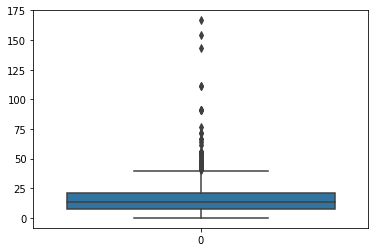

In [20]:
sns.boxplot(data=data['Mortalidade Infantil'])

##Proposta de distribuição por quartis:
* Primeiro quartil: "Baixa"
* Segundo quartil: "Média"
* Terceiro quartil: "Média-alta"
* Limite superior: "Alta"
* Outliers: "Muito Alta"

In [21]:
IQR = data['Mortalidade Infantil'].quantile(.75) - data['Mortalidade Infantil'].quantile(.25)
# como não há nenhum "outlier inferior", iremos utilizar apenas o limite superior (determinado a partir da IQR)
sup = data['Mortalidade Infantil'].quantile(.75) + 1.5 * IQR

In [22]:
bins = [0,
        data['Mortalidade Infantil'].quantile(.25),
        data['Mortalidade Infantil'].quantile(.50),
        data['Mortalidade Infantil'].quantile(.75),
        sup,
        data['Mortalidade Infantil'].max()]
labels = ['Baixa', 'Média', 'Média-alta', 'Alta', 'Muito Alta']
data['Classificação Mortalidade Infantil'] = pd.cut(data['Mortalidade Infantil'], bins=bins, labels=labels)
data

,Município,Codigo_IBGE,Mortalidade Infantil,Classificação Mortalidade Infantil
0,ADAMANTINA,3500105,11.63,Média
1,ADOLFO,3500204,19.23,Média-alta
2,AGUAÍ,3500303,16.06,Média-alta
3,ÁGUAS DA PRATA,3500402,25.32,Alta
4,ÁGUAS DE LINDÓIA,3500501,8.37,Média
...,...,...,...,...
640,VOTORANTIM,3557006,13.64,Média-alta
641,VOTUPORANGA,3557105,8.61,Média
642,ZACARIAS,3557154,32.26,Alta
643,CHAVANTES,3557204,5.29,Baixa


###Histograma da distribuição

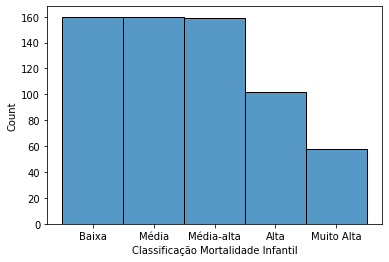

In [23]:
sns.histplot(data=data['Classificação Mortalidade Infantil'])

In [24]:
data['Classificação Mortalidade Infantil'].value_counts()

Baixa         160
Média         160
Média-alta    159
Alta          102
Muito Alta     58
Name: Classificação Mortalidade Infantil, dtype: int64